In [1]:
# Gerekli Kütüphaneleri Yükleyin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\Users\hsynt\Downloads\Selcuk Abi\Selcuk Abi\VeriSeti2.csv")

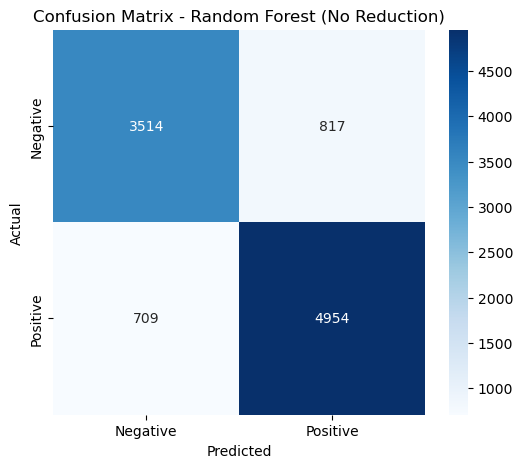

C:\Users\hsynt\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


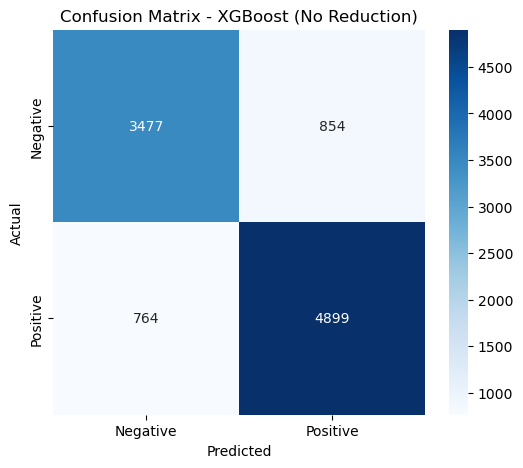

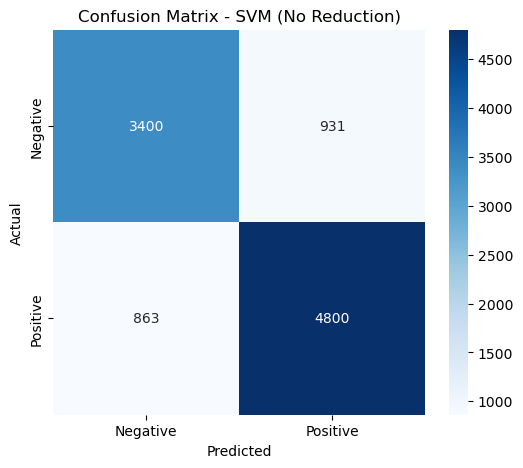

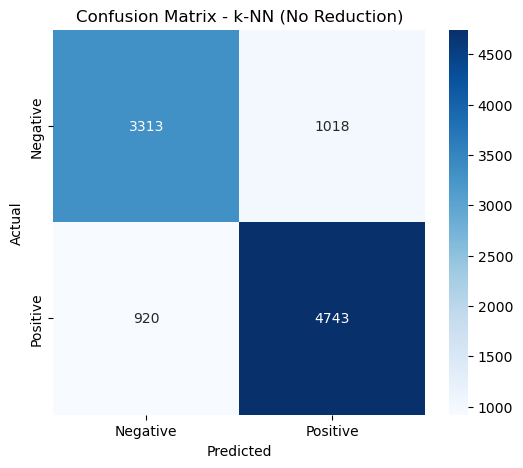

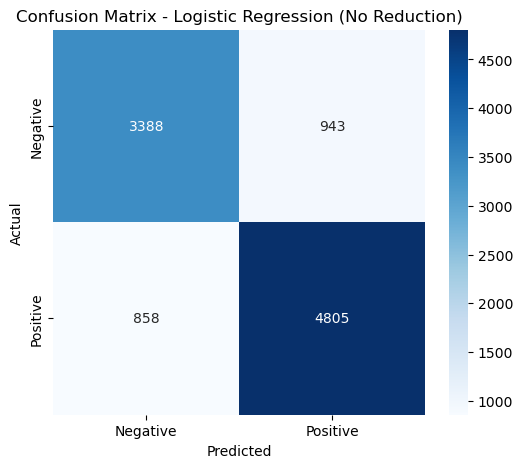

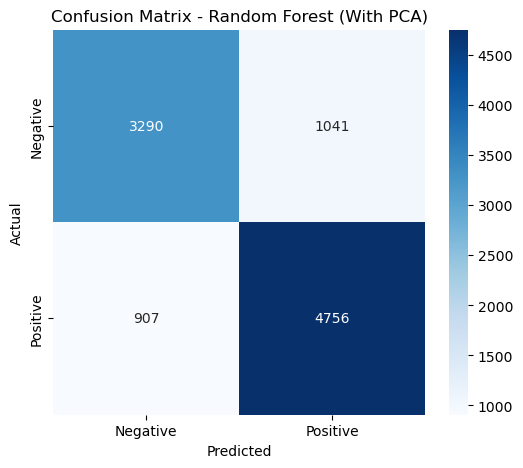

C:\Users\hsynt\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:49:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


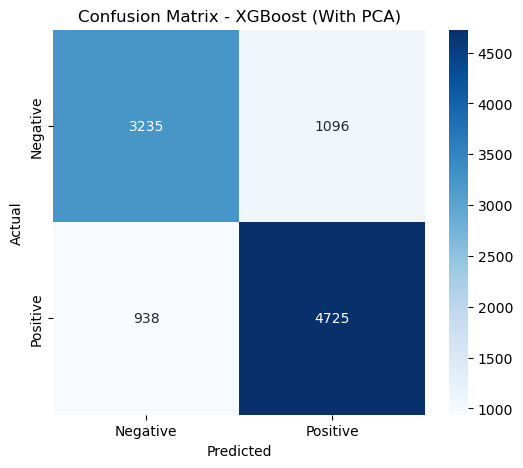

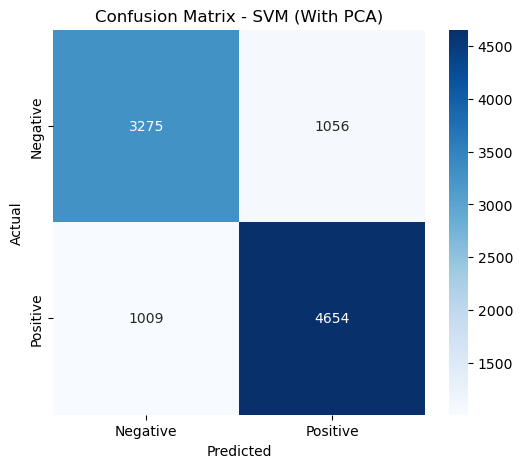

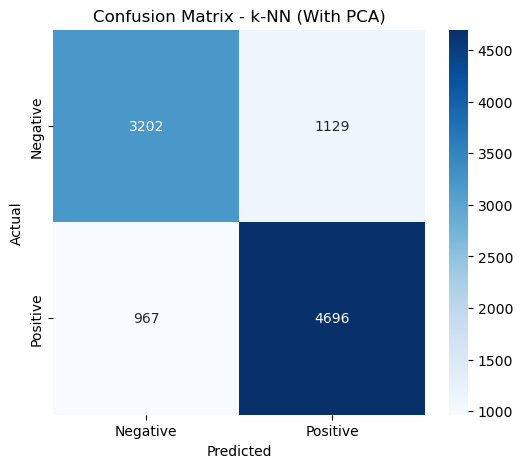

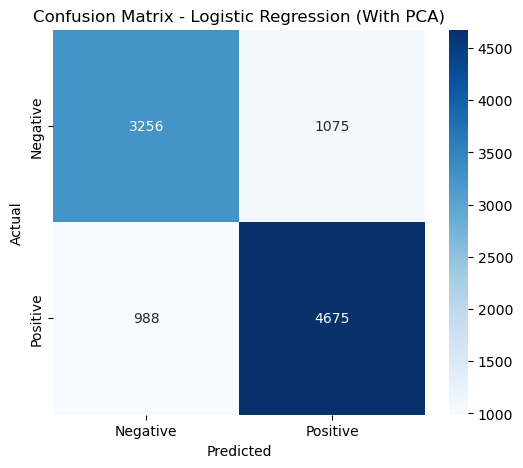

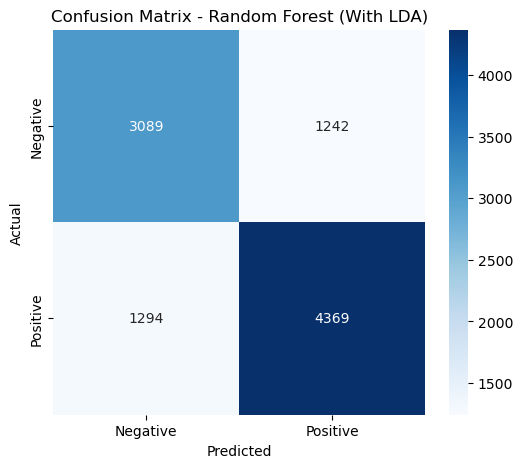

C:\Users\hsynt\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


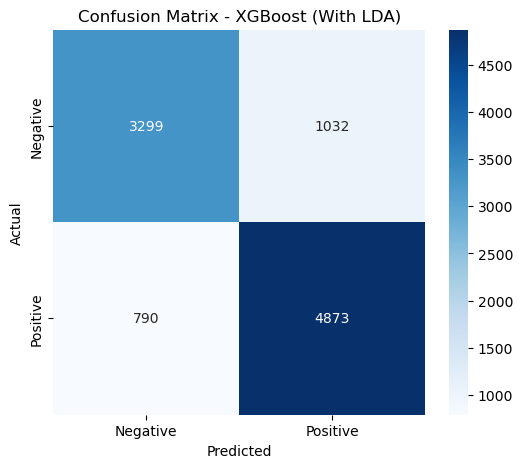

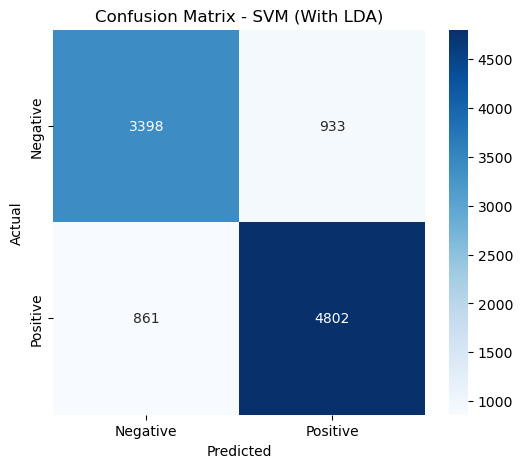

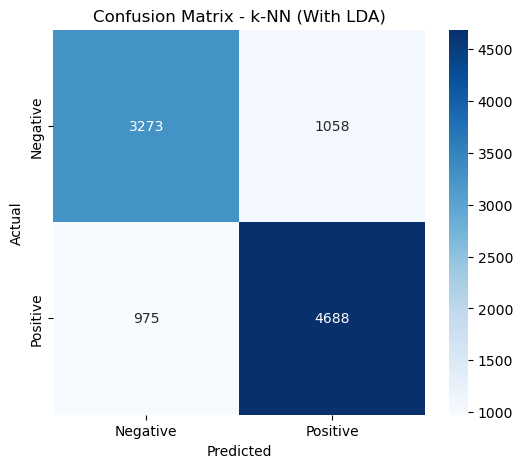

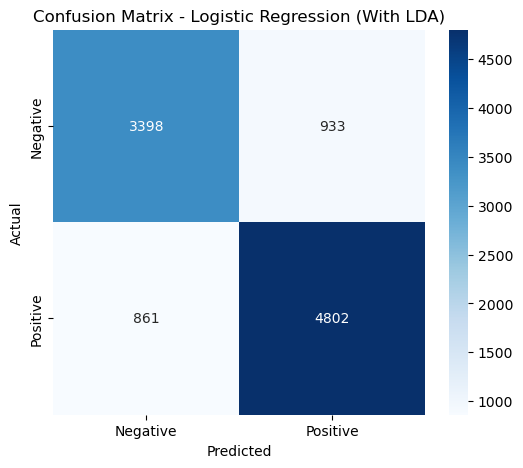

TP-TN-FP-FN Değerleri Tablosu:
       Reduction                Model    TP    TN    FP    FN
0   No Reduction        Random Forest  4954  3514   817   709
1   No Reduction              XGBoost  4899  3477   854   764
2   No Reduction                  SVM  4800  3400   931   863
3   No Reduction                 k-NN  4743  3313  1018   920
4   No Reduction  Logistic Regression  4805  3388   943   858
5       With PCA        Random Forest  4756  3290  1041   907
6       With PCA              XGBoost  4725  3235  1096   938
7       With PCA                  SVM  4654  3275  1056  1009
8       With PCA                 k-NN  4696  3202  1129   967
9       With PCA  Logistic Regression  4675  3256  1075   988
10      With LDA        Random Forest  4369  3089  1242  1294
11      With LDA              XGBoost  4873  3299  1032   790
12      With LDA                  SVM  4802  3398   933   861
13      With LDA                 k-NN  4688  3273  1058   975
14      With LDA  Logistic Regression  

In [3]:
# Özellik ve Hedef Ayrımı
X = data.drop(columns=['Target_10', 'adjclose'])
y = data['Target_10']

# Eğitim ve Test Setlerine Bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Özellikleri Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA ve LDA Dönüşümleri
pca = PCA(n_components=10)
lda = LDA()

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Algoritmalar ve İsimleri
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# PCA, LDA ve No Reduction Durumlarını İçeren Modellerin TP, TN, FP, FN Değerlerinin Hesaplanması
reductions = {
    "No Reduction": (X_train_scaled, X_test_scaled),
    "With PCA": (X_train_pca, X_test_pca),
    "With LDA": (X_train_lda, X_test_lda)
}

confusion_matrix_results = []

for reduction_name, (X_tr, X_te) in reductions.items():
    for model_name, model in models.items():
        # Modeli Eğitme
        model.fit(X_tr, y_train)

        # Test Kümesi Tahminleri
        y_test_pred = model.predict(X_te)

        # Confusion Matrix Hesaplama
        cm = confusion_matrix(y_test, y_test_pred)
        tn, fp, fn, tp = cm.ravel()

        # Sonuçları Listeye Ekleyin
        confusion_matrix_results.append({
            "Reduction": reduction_name,
            "Model": model_name,
            "TP": tp,
            "TN": tn,
            "FP": fp,
            "FN": fn
        })

        # Confusion Matrix Görselleştirme
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title(f'Confusion Matrix - {model_name} ({reduction_name})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

# Sonuçları DataFrame Olarak Gösterme
confusion_matrix_df = pd.DataFrame(confusion_matrix_results)

# Performans Sonuçları Tablosunu Görüntüleme
print("TP-TN-FP-FN Değerleri Tablosu:")
print(confusion_matrix_df)